In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import read_data as rd
from metrics import cwcf, picpf, pinewf
import time
from predict_fx import xxx_cross_validation, xxx_test_validation, predict_diff, predict_sp_diff

In [2]:
ts_sm, ts_tr, ts_pe = rd.load_sp()


In [10]:
res = np.array([])
# ===========================================  bayesian ===========================================#
# timeuse_arr = np.array([])
# for i in range(70):
st = time.time()
predict_diff(ts_sm, model='bayesian', is_plt=False)
ed1 = time.time()
predict_diff(ts_tr, model='bayesian', is_plt=False)
ed2 = time.time()
predict_diff(ts_pe, model='bayesian', is_plt=False)
ed3 = time.time()
print((ed1 - st, ed2 - ed1, ed3 - ed2))
timeuse = (ed1 - st)*7886 + (ed2 - ed1)*3719 + (ed3 - ed2)*141
print((timeuse))
#     timeuse_arr = np.append(timeuse_arr, timeuse)
res = np.append(res, timeuse)
# print(timeuse_arr.mean())

# ===========================================  linear ===========================================#
st = time.time()
predict_diff(ts_sm, model='linear', is_plt=False)
ed1 = time.time()
predict_diff(ts_tr, model='linear', is_plt=False)
ed2 = time.time()
predict_diff(ts_pe, model='linear', is_plt=False)
ed3 = time.time()
print((ed1 - st, ed2 - ed1, ed3 - ed2))
timeuse = (ed1 - st)*7886 + (ed2 - ed1)*3719 + (ed3 - ed2)*141
res = np.append(res, timeuse)
print((timeuse))

# ===========================================  svm ===========================================#
st = time.time()
predict_diff(ts_sm, model='svm', is_plt=False)
ed1 = time.time()
predict_diff(ts_tr, model='svm', is_plt=False)
ed2 = time.time()
predict_diff(ts_pe, model='svm', is_plt=False)
ed3 = time.time()
print((ed1 - st, ed2 - ed1, ed3 - ed2))
timeuse = (ed1 - st)*7886 + (ed2 - ed1)*3719 + (ed3 - ed2)*141
res = np.append(res, timeuse)
print((timeuse))


# ===========================================  cart ===========================================#
st = time.time()
predict_diff(ts_sm, model='cart', is_plt=False)
ed1 = time.time()
predict_diff(ts_tr, model='cart', is_plt=False)
ed2 = time.time()
predict_diff(ts_pe, model='cart', is_plt=False)
ed3 = time.time()
print((ed1 - st, ed2 - ed1, ed3 - ed2))
timeuse = (ed1 - st)*7886 + (ed2 - ed1)*3719 + (ed3 - ed2)*141
res = np.append(res, timeuse)
print((timeuse))

# ===========================================  rfr ===========================================#
st = time.time()
predict_diff(ts_sm, model='rfr', is_plt=False)
ed1 = time.time()
predict_diff(ts_tr, model='rfr', is_plt=False)
ed2 = time.time()
predict_diff(ts_pe, model='rfr', is_plt=False)
ed3 = time.time()
print((ed1 - st, ed2 - ed1, ed3 - ed2))
timeuse = (ed1 - st)*7886 + (ed2 - ed1)*3719 + (ed3 - ed2)*141
res = np.append(res, timeuse)
print((timeuse))

# ===========================================  pso-svm whih svm parameter is specific ===========================================#
st = time.time()
predict_diff(ts_sm, model='svm', is_plt=False)
ed1 = time.time()
predict_diff(ts_tr, model='svm', is_plt=False)
ed2 = time.time()
predict_diff(ts_pe, model='svm', is_plt=False)
ed3 = time.time()
print((ed1 - st, ed2 - ed1, ed3 - ed2))
timeuse = (ed1 - st)*7886 + (ed2 - ed1)*3719 + (ed3 - ed2)*141
res = np.append(res, timeuse)
print((timeuse))

bayesian
Result of Cross validation: 
cwc 3.530757, picp 0.763889, pinew 0.642450
Result of Test validation: 
cwc 1.519851, picp 0.882353, pinew 0.693047
bayesian
Result of Cross validation: 
cwc 5.397438, picp 0.708333, pinew 0.372046
Result of Test validation: 
cwc 0.805527, picp 0.882353, pinew 0.367317
bayesian
Result of Cross validation: 
cwc -22.893853, picp 0.729167, pinew 0.265668
Result of Test validation: 
cwc 0.582153, picp 0.882353, pinew 0.265460
(0.03095531463623047, 0.044841766357421875, 0.18514609336853027)
436.9857394695282
linear
Result of Cross validation: 
cwc 3.079748, picp 0.770833, pinew 0.620445
Result of Test validation: 
cwc 0.678323, picp 0.917647, pinew 0.678323
linear
Result of Cross validation: 
cwc 3.370981, picp 0.736111, pinew 0.373838
Result of Test validation: 
cwc 0.800057, picp 0.882353, pinew 0.364823
linear
Result of Cross validation: 
cwc 10.207799, picp 0.708333, pinew 0.321454
Result of Test validation: 
cwc 0.578540, picp 0.882353, pinew 0.263

In [4]:
res


array([ 411.76720047,  390.63455939,  523.77671313,  385.28703022,
       3863.33401871,  594.61855602])

In [12]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

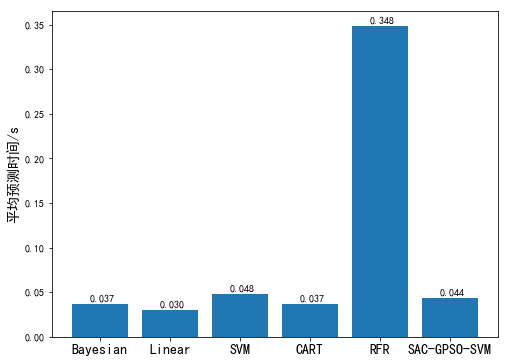

In [15]:
tmp = res / 11746
plt.figure(figsize=(8, 6))
plt.bar(range(6), tmp)
plt.xticks(range(6), ['Bayesian', 'Linear', 'SVM', 'CART', 'RFR', 'SAC-GPSO-SVM'], fontsize=14)
plt.ylabel('平均预测时间/s', fontsize=14)
for x, y in enumerate(tmp):
    plt.text(x - 0.15, y+0.003, '%.3f' % y)
# plt.show()
plt.savefig("fig/3-11.png", dpi=600)